# Rocks analysis demo. 

* Add instruction here or in readme for how to set up your own analysis pipeline. 

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np

# Jupyter Lab imports.
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed

# Path to local imports.
sys.path.append("/home/drew/He6CRES/rocks_analysis_pipeline/")
from results import ExperimentResults
from rocks_utility import he6cres_db_query


## Step 0: Query the postgres database to see what run_ids to analyze. 

In [2]:
query_run_log = '''
                    SELECT run_id, run_notes, set_field, created_at, EXTRACT(MONTH from created_at::date) as month
                    FROM he6cres_runs.run_log
                    WHERE num_spec_acq = 100 AND
                    EXTRACT(MONTH from created_at::date) = 8
                    ORDER BY run_id DESC 
                    LIMIT 80
                  '''

run_log = he6cres_db_query(query_run_log, local = True)

first_rid_per_field = run_log.groupby(["set_field"]).count()
display(first_rid_per_field)
display(run_log[-30:])

he6_run_list = run_log.run_id.to_list()
he6_field_list = run_log.set_field.to_list()

print(" ".join(str(x) for x in he6_run_list[-57:]))
print(f"\n\n{len(he6_run_list)}")
print(" ".join(str(x) for x in he6_field_list[-57:]))

NameError: name 'he6cres_db_query' is not defined

## Step 1: Analyze the run_ids. 

* Follow the instructions in the [readme](https://github.com/Helium6CRES/rocks_analysis_pipeline).

## Step 2: Visualize the results and/or build a spectrum. 

### 2a: Grab the experiment directory and root files from rocks.

In [23]:
# local_dir = "/media/drew/T7 Shield/rocks_analysis/saved_experiments"
# experiment_name = "he6_full_0"
# analysis_id = 1

# Newer analysis. 
local_dir = "/media/drew/T7 Shield/rocks_analysis/saved_experiments"
experiment_name = "he_snr8_fn100"
analysis_id = 21

include_root_files = True
max_root_files_to_grab = 0
rebuild_experiment_dir = False

In [24]:
exp_results_demo = ExperimentResults(local_dir = local_dir, 
                                     experiment_name = experiment_name, 
                                     analysis_id = analysis_id, 
                                     include_root_files = include_root_files,
                                     max_root_files_to_grab = max_root_files_to_grab,
                                     rebuild_experiment_dir=rebuild_experiment_dir,
                                    )

Keeping existing experiment directory.


All 0 root files are already present here: /media/drew/T7 Shield/rocks_analysis/saved_experiments/he_snr8_fn100_aid_21/root_files


### 2b: Look at the attributes of the exp_results_demo object.

In [8]:
exp_results_demo.events.groupby([ "set_field"]).run_id.unique().reset_index()

,set_field,run_id
0,0.75,"[436, 437]"
1,1.00,"[430, 432, 433, 431, 434]"
2,1.25,"[424, 425, 426, 427, 428]"
3,1.50,"[418, 419, 420, 421, 422]"
4,1.75,"[411, 412, 413, 414, 416, 415]"
5,2.00,"[405, 406, 407, 408, 409]"
6,2.25,"[399, 400, 401, 402, 403]"
7,2.50,"[393, 394, 395, 396, 397]"
8,2.75,"[387, 388, 389, 390, 391]"
9,3.00,"[380, 381, 382, 383, 384]"


In [9]:
exp_results_demo.root_files.head(3)

,run_id,spec_id,file_path,true_field,analysis_id,root_file_exists,file_id,rocks_file_path,exists,approx_slope,...,base_config_path,output_dir,noise_file_path,rocks_noise_file_path,root_file_path,pst_time,utc_time,monitor_rate,field,set_field
0,437,11514,/mnt/sdb/data/Freq_data_2022-08-18-11-32-23.spec,0.749922,1,True,0,/data/eliza4/he6_cres/sdb/data/Freq_data_2022-...,True,5.111293e+08,...,/data/eliza4/he6_cres/katydid_analysis/base_co...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,/mnt/sdb/data/Freq_data_2022-08-18-11-31-49.spec,/data/eliza4/he6_cres/sdb/data/Freq_data_2022-...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 11:32:23-07:00,2022-08-18 18:32:23+00:00,54746.75,0.749923,0.75
1,437,11515,/mnt/sdc/data/Freq_data_2022-08-18-11-32-26.spec,0.749922,1,True,1,/data/eliza4/he6_cres/sdc/data/Freq_data_2022-...,True,5.111293e+08,...,/data/eliza4/he6_cres/katydid_analysis/base_co...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,/mnt/sdb/data/Freq_data_2022-08-18-11-31-49.spec,/data/eliza4/he6_cres/sdb/data/Freq_data_2022-...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 11:32:26-07:00,2022-08-18 18:32:26+00:00,54226.00,0.749923,0.75
2,437,11516,/mnt/sdd/data/Freq_data_2022-08-18-11-32-29.spec,0.749922,1,True,2,/data/eliza4/he6_cres/sdd/data/Freq_data_2022-...,True,5.111293e+08,...,/data/eliza4/he6_cres/katydid_analysis/base_co...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,/mnt/sdb/data/Freq_data_2022-08-18-11-31-49.spec,/data/eliza4/he6_cres/sdb/data/Freq_data_2022-...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 11:32:29-07:00,2022-08-18 18:32:29+00:00,53161.84,0.749923,0.75


In [10]:
exp_results_demo.tracks.head(3)

,run_id,file_id,root_file_path,field,monitor_rate,UniqueID,Bits,Component,AcquisitionID,TrackID,...,FreqIntc,TimeIntc,MeanTrackSNR,set_field,TimeIntc_mean,TimeIntc_std,TimeLength_mean,TimeLength_std,Slope_mean,Slope_std
0,433,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,0.999983,55125.0,0.0,50331648.0,0.0,0.0,89.0,...,4.651677e+08,-0.101888,12.858736,1.0,-2.408816e+06,7.074596e+06,0.000057,0.00002,5.251572e+09,3.630491e+09
1,433,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,0.999983,55125.0,0.0,50331648.0,0.0,0.0,90.0,...,5.112939e+08,-0.134832,12.759588,1.0,-2.408816e+06,7.074596e+06,0.000057,0.00002,5.251572e+09,3.630491e+09
2,433,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,0.999983,55125.0,0.0,50331648.0,0.0,0.0,91.0,...,4.300605e+08,-0.083509,11.251566,1.0,-2.408816e+06,7.074596e+06,0.000057,0.00002,5.251572e+09,3.630491e+09


In [11]:
exp_results_demo.events.head(3)

,run_id,file_id,EventID,EventStartTime,EventEndTime,EventStartFreq,EventEndFreq,EventTimeLength,EventFreqLength,EventTrackCoverage,EventMeanSNR,EventSlope,EventNBins,EventTrackTot,EventFreqIntc,EventTimeIntc,field,set_field,monitor_rate
0,373,0,1,0.024989,0.027051,5.220255e+08,8.900276e+08,0.002062,3.680021e+08,0.695364,10.758913,1.784985e+11,55.0,12,-3.938476e+09,0.022064,3.249954,3.25,58525.0
1,373,0,2,0.048370,0.054460,1.024997e+08,1.186159e+09,0.006089,1.083660e+09,1.033632,12.568884,1.779588e+11,381.0,77,-8.505428e+09,0.047794,3.249954,3.25,58525.0
2,373,0,3,0.120849,0.123081,6.125950e+08,1.009885e+09,0.002232,3.972896e+08,1.079511,10.880306,1.779716e+11,60.0,12,-2.089511e+10,0.117407,3.249954,3.25,58525.0


## Are all the desired fields present?

In [12]:
len(exp_results_demo.run_ids)

53

In [13]:
exp_results_demo.root_files.groupby(["set_field"]).root_file_exists.sum().reset_index()

,set_field,root_file_exists
0,0.75,199
1,1.00,500
2,1.25,497
3,1.50,496
4,1.75,598
5,2.00,498
6,2.25,500
7,2.50,500
8,2.75,500
9,3.00,499


### 2c: Visualize the quality of track and event reconstruction.

In [25]:
%matplotlib widget

plt.rcParams['figure.dpi']= 100

@interact
def analysis_viz(
    run_id = widgets.Select(options = exp_results_demo.run_ids, description='run_id: ', value = 393),
    file_id = widgets.Select(options = exp_results_demo.file_ids, description='file_id: '),
    events = widgets.Checkbox(True, description='events'),
    tracks = widgets.Checkbox(False, description='tracks'),
    sparse = widgets.Checkbox(False, description='sparse_spec'),
    EventID = widgets.IntSlider(value=1,min=1,max=20,step=1),
    mrk_sz = widgets.FloatSlider(value=.08,min=0,max=1.0,step=1e-2),
    alpha = widgets.FloatSlider(value=1.0,min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=.7,min=0.0,max=1.0,step=1e-2),
):

    config = {"tracks": {"show": tracks,  "alpha": .8, "EventIDs":[]}, 
              "events": {"show": events, "alpha": .8, "cuts": {}, "EventIDs":[]}, 
              "sparse_spec": {"show": sparse, "frac_pts": frac_pts,  "alpha": 1, "mrk_sz": mrk_sz}}
    
    exp_results_demo.visualize(run_id, file_id, config)
    plt.show()

interactive(children=(Select(description='run_id: ', index=13, options=(373, 374, 375, 376, 377, 382, 383, 384…

### 2d: Visualize the relationship between different track attributes.

In [15]:
exp_results_demo.tracks = exp_results_demo.tracks[exp_results_demo.tracks.run_id != 380]

# Try this to see if it scales with SNR. 
# exp_results_demo.tracks["Slope_normed"] = exp_results_demo.tracks["Slope"] / exp_results_demo.tracks.groupby(["set_field"])["Slope"].mean().reset_index()


In [16]:
%matplotlib widget

set_fields = sorted(exp_results_demo.tracks['set_field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    field = widgets.Select(options = set_fields,  description='set_field: '),
    column_1 = widgets.Select(options = exp_results_demo.tracks.columns,value = 'StartFrequency', description='x_col: '),
    column_2 = widgets.Select(options = exp_results_demo.tracks.columns,value = 'Slope', description='y_col: '),
    mrk_sz = widgets.FloatSlider(value=.4, min=0,max=1.0,step=1e-2),
    alpha = widgets.FloatSlider(value=.5, min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=0.02,min=0.0,max=1.0,step=1e-2), 
    bins = widgets.IntSlider(value=200,min=50,max=700,step=10),
    fix_field = widgets.Checkbox(
    value=False,
    description='fix field',
    disabled=False,
    indent=False
)
):
    
    plt.close("all")
    scatt_settings={
            "figsize": (12, 4),
            "colors": ["b", "r", "g", "c", "m", "k"],
            "hist_bins": bins,
            "markersize": mrk_sz,
            "alpha": alpha,
        }
    exp_results_demo.scatter("tracks", column_1, column_2, fix_field = fix_field, field_value = field, scatt_settings = scatt_settings)

interactive(children=(Select(description='set_field: ', options=(0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2…

### 2e: Visualize the relationship between different event attributes.

In [11]:
exp_results_demo.events = exp_results_demo.events[~exp_results_demo.events.run_id.isin([377,380, 381])]

In [12]:
%matplotlib widget

set_fields = sorted(exp_results_demo.events['set_field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    field = widgets.Select(options = set_fields,  description='set_field: '),
    column_1 = widgets.Select(options = exp_results_demo.events.columns,value = 'EventStartFreq', description='x_col: '),
    column_2 = widgets.Select(options = exp_results_demo.events.columns,value = 'EventSlope', description='y_col: '),
    mrk_sz = widgets.FloatSlider(value=.4, min=0,max=1.0,step=1e-2),
    alpha = widgets.FloatSlider(value=.5, min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=0.02,min=0.0,max=1.0,step=1e-2), 
    bins = widgets.IntSlider(value=200,min=50,max=700,step=10),
    fix_field = widgets.Checkbox(
    value=False,
    description='fix field',
    disabled=False,
    indent=False
)
):
    
    plt.close("all")
    scatt_settings={
            "figsize": (12, 4),
            "colors": ["b", "r", "g", "c", "m", "k"],
            "hist_bins": bins,
            "markersize": mrk_sz,
            "alpha": alpha,
        }
    exp_results_demo.scatter("events", column_1, column_2, fix_field = fix_field, field_value = field, scatt_settings = scatt_settings)

interactive(children=(Select(description='set_field: ', options=(0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2…

In [15]:
import matplotlib

matplotlib.__version__

'3.5.1'

In [17]:
df.columns

Index(['run_id', 'file_id', 'EventID', 'EventStartTime', 'EventEndTime',
       'EventStartFreq', 'EventEndFreq', 'EventTimeLength', 'EventFreqLength',
       'EventTrackCoverage', 'EventMeanSNR', 'EventSlope', 'EventNBins',
       'EventTrackTot', 'EventFreqIntc', 'EventTimeIntc', 'field', 'set_field',
       'monitor_rate'],
      dtype='object')

In [27]:
df = exp_results_demo.events
df = df[ (df.EventTimeIntc < 10) & (df.EventTimeIntc >-10)]

In [28]:
%matplotlib widget

df = exp_results_demo.events
df = df[ (df.EventTimeIntc < 10) & (df.EventTimeIntc >-10)]
df_categorical = df.loc[:, df.apply(lambda x: x.nunique()) <= 50]
fields = sorted(df['field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    column_1 = widgets.Select(options = df.columns,value = 'EventMeanSNR', description='x_col: '),
    column_2 = widgets.Select(options = df.columns,value = 'EventTimeLength', description='y_col: '),
    column_3 = widgets.Select(options = df_categorical.columns,value = 'set_field', description='hue_col: '),
    mrk_sz = widgets.FloatSlider(value=1, min=0,max=4.0,step=1e-2),
    alpha = widgets.FloatSlider(value=.5, min=0.0,max=1.0,step=1e-2),
):
    
    plt.close("all")

    sns.lmplot(x=column_1, y=column_2, data=df, hue=column_3, fit_reg=False, scatter_kws={'s': mrk_sz, 'alpha': alpha})
    plt.show()

interactive(children=(Select(description='x_col: ', index=10, options=('run_id', 'file_id', 'EventID', 'EventS…

## Plot for DNP: 

In [25]:
exp_results_demo.events = exp_results_demo.events[~exp_results_demo.events.run_id.isin([377,380, 381])]

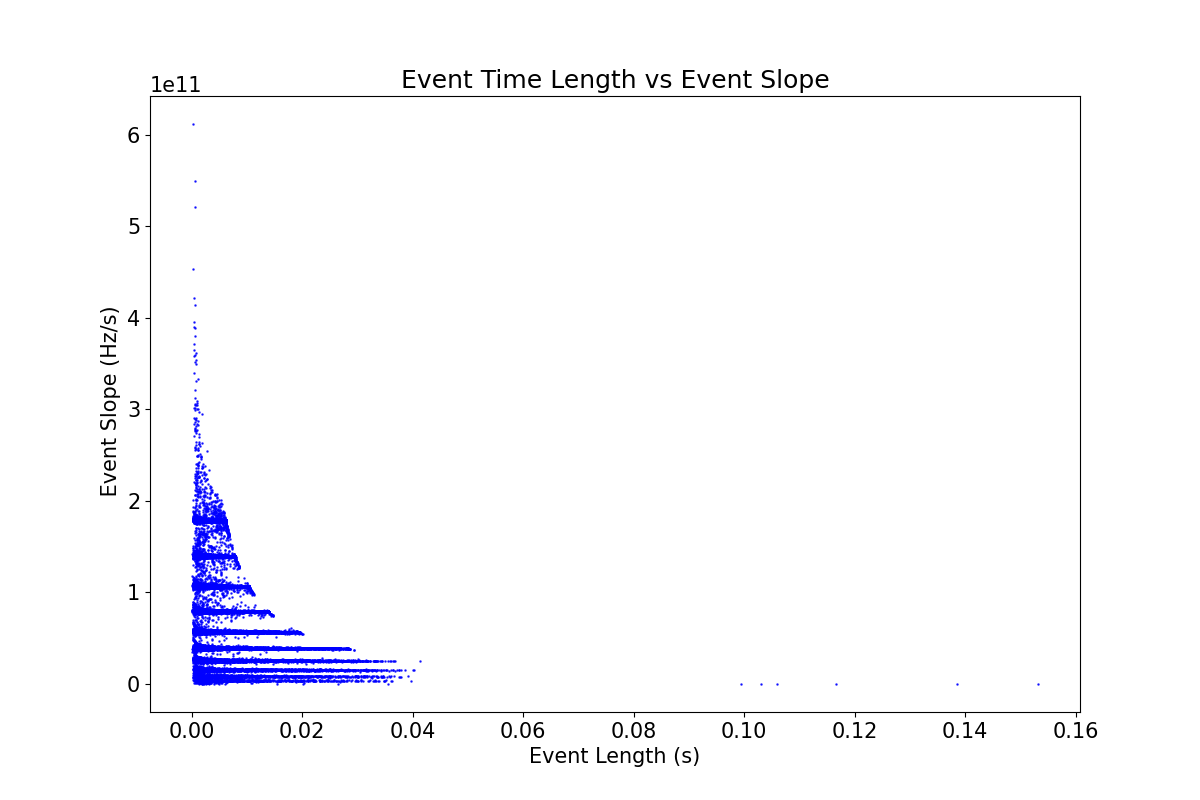

In [23]:
x = exp_results_demo.events.EventTimeLength
y = exp_results_demo.events.EventSlope

plt.close("all")
plt.rcParams.update({'font.size': 15})
fig0, ax0 = plt.subplots(figsize=(12,8))

ax0.set_title("Event Time Length vs Event Slope")
ax0.set_xlabel("Event Length (s)")
ax0.set_ylabel(" Event Slope (Hz/s)")

# Scatter Plots
ax0.plot(
    x,
    y,
    "o",
    markersize=.8,
    alpha=.8,
    color='b',
)

plt.show()

## Building a Spectrum: 

Steps. 
1. Cut bad run ids
2. Make appropriate cuts. 
3. Normalize based on total number of files and their monitor rates. Be careful to include files that didn't contain any events in the accounting. 

Notes: 

* 377, 380, 381 all have curropt files (every 3rd or so)
* 412 seems to be empty in the second half (maybe beam went down?)

## 1. Cut bad run ids

In [82]:
exp_results_demo.root_files = exp_results_demo.root_files[~exp_results_demo.root_files.run_id.isin([377,380, 381])]

## 2. Make appropriate cuts.

Cuts to make:
a. EventStartFreq
b. EventMeanSNR

Others to consider: 
TimeIntercept, TrackLen? 

In [131]:
condition = ((exp_results_demo.events.EventStartFreq > 150e6) & (exp_results_demo.events.EventMeanSNR > exp_results_demo.events.EventMeanSNR.max()*.5))
valid_events = exp_results_demo.events[condition]


## 3. Normalize. 

In [132]:
condition = (exp_results_demo.root_files.root_file_exists ==True)
normalize_df = exp_results_demo.root_files[condition].groupby(["run_id", "file_id"])[["monitor_rate", "set_field"]].first().reset_index()

display(normalize_df.head())

,run_id,file_id,monitor_rate,set_field
0,373,0,58525.00,3.25
1,373,1,58890.89,3.25
2,373,2,57547.55,3.25
3,373,3,57376.00,3.25
4,373,4,59665.00,3.25


In [133]:
event_counts = valid_events.groupby(["run_id", "file_id"]).EventID.count().to_frame("event_count").reset_index()
event_counts.head()

,run_id,file_id,event_count
0,373,0,2
1,373,1,10
2,373,2,5
3,373,3,2
4,373,4,4


### Merge these two dfs. 


In [160]:
spectrum_df = pd.merge(normalize_df, event_counts, how = "left", left_on = ["run_id", "file_id"], right_on = ["run_id", "file_id"])

spectrum_df.head()

,run_id,file_id,monitor_rate,set_field,event_count
0,373,0,58525.00,3.25,2.0
1,373,1,58890.89,3.25,10.0
2,373,2,57547.55,3.25,5.0
3,373,3,57376.00,3.25,2.0
4,373,4,59665.00,3.25,4.0


In [135]:
spectrum_df.event_count.isna().sum()

704

In [136]:
spectrum_df = spectrum_df.fillna(0)
spectrum_df.head()

,run_id,file_id,monitor_rate,set_field,event_count
0,373,0,58525.00,3.25,2.0
1,373,1,58890.89,3.25,10.0
2,373,2,57547.55,3.25,5.0
3,373,3,57376.00,3.25,2.0
4,373,4,59665.00,3.25,4.0


### Normalize by monitor_rate

In [137]:
spectrum_df["normed_event_rate"] = spectrum_df.event_count / spectrum_df.monitor_rate
spectrum_df.head()

,run_id,file_id,monitor_rate,set_field,event_count,normed_event_rate
0,373,0,58525.00,3.25,2.0,0.000034
1,373,1,58890.89,3.25,10.0,0.000170
2,373,2,57547.55,3.25,5.0,0.000087
3,373,3,57376.00,3.25,2.0,0.000035
4,373,4,59665.00,3.25,4.0,0.000067


## Normalize by total number of seconds acquired

Notes: Somehow missed 3 rids from .75 and the 3 missing at 3.0 T and 3.25 T are from the messed up files. 

Am I double counting by dividing by the time again??

In [140]:
spec2 = spectrum_df.groupby(["set_field"])[["normed_event_rate","event_count", "monitor_rate"]].sum().reset_index()

spec3 = spectrum_df.groupby(["set_field"]).normed_event_rate.count().reset_index()
# spec2["normed2_event_rate"] = spectrum_df.groupby(["set_field"]).normed_event_rate.count()spectrum_df.groupby(["set_field"]).normed_event_rate.sum()
spec2.head(10)
spec3.head(10)
spec4 = pd.merge(spec2, spec3, how = "inner", left_on = ["set_field"], right_on = ["set_field"])

spec4.head(20)
spec4["normed_rate_final"] = spec4.normed_event_rate_x / spec4.normed_event_rate_y

# Norm to 1 
spec4["normed_rate_final"]/= spec4["normed_rate_final"].sum()


spec4["normed_rate_final_uncert"] = spec4["normed_rate_final"] / (spec4["event_count"]**.5)

spec4.head(20)

,set_field,normed_event_rate_x,event_count,monitor_rate,normed_event_rate_y,normed_rate_final,normed_rate_final_uncert
0,0.75,0.000661,35.0,10431713.20,199,0.004075,0.000689
1,1.00,0.008856,481.0,27086019.77,500,0.021728,0.000991
2,1.25,0.014972,756.0,25103944.73,497,0.036953,0.001344
3,1.50,0.024020,1181.0,25077517.76,496,0.059403,0.001729
4,1.75,0.041861,1663.0,26267465.36,591,0.086884,0.002131
5,2.00,0.044611,2122.0,25732733.17,498,0.109884,0.002385
6,2.25,0.049826,2594.0,25725930.05,500,0.122237,0.002400
7,2.50,0.057988,3026.0,25977301.17,500,0.142262,0.002586
8,2.75,0.058850,3029.0,25609743.42,500,0.144376,0.002623
9,3.00,0.035384,1897.0,16074591.00,300,0.144678,0.003322


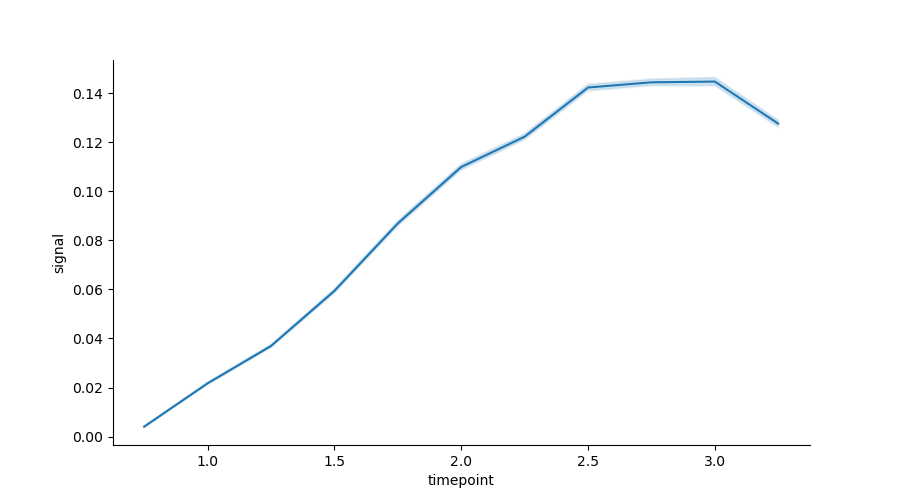

In [141]:
# Compute upper and lower bounds using chosen uncertainty measure: here
# it is a fraction of the standard deviation of measurements at each
# time point based on the unbiased sample variance
x = spec4["set_field"]
y_mean = spec4["normed_rate_final"]
error = 0.5*spec4["normed_rate_final_uncert"]
lower = y_mean - error
upper = y_mean + error

# Draw plot with error band and extra formatting to match seaborn style
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, y_mean, label='signal mean')
ax.plot(x, lower, color='tab:blue', alpha=0.1)
ax.plot(x, upper, color='tab:blue', alpha=0.1)
ax.fill_between(x, lower, upper, alpha=0.2)
ax.set_xlabel('timepoint')
ax.set_ylabel('signal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

<AxesSubplot:xlabel='set_field'>

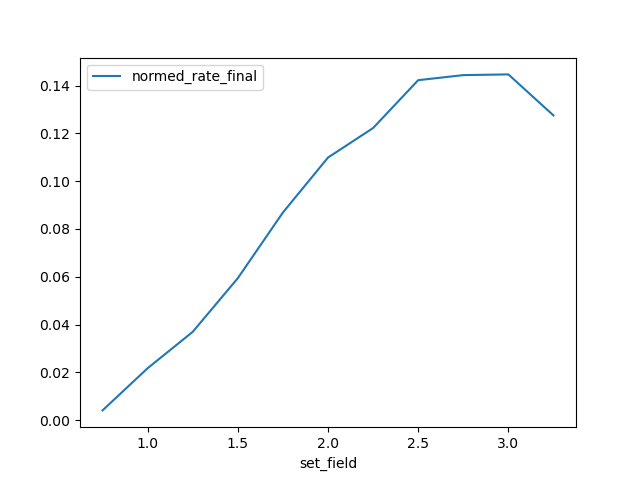

In [139]:
spec4.plot.line(x="set_field", y="normed_rate_final")

## Make a function to do the above. 

In [149]:
cuts = {"EventMeanSNR": .5, "EventStartFreq": 150e6}
list(cuts.values())

[0.5, 150000000.0]

In [194]:
def build_spectrum(events, root_files, cuts = {"EventMeanSNR": .5, "EventStartFreq": 150e6}): 
    cols = list
    condition = ((exp_results_demo.events["EventMeanSNR"] > cuts["EventMeanSNR"]* exp_results_demo.events["EventMeanSNR"].max()) 
                 & (exp_results_demo.events["EventStartFreq"] > cuts["EventStartFreq"]))
    print(condition.mean())
    valid_events = exp_results_demo.events[condition]
    
    # display(valid_events.head())
    
    condition = (exp_results_demo.root_files.root_file_exists ==True)
    normalize_df = exp_results_demo.root_files[condition].groupby(["run_id", "file_id"])[["monitor_rate", "set_field"]].first().reset_index()

    # display(normalize_df.head())
    
    event_counts = valid_events.groupby(["run_id", "file_id"]).EventID.count().to_frame("event_count").reset_index()
    # display(event_counts.head())
    
    spec1 = pd.merge(normalize_df, event_counts, how = "left", left_on = ["run_id", "file_id"], right_on = ["run_id", "file_id"])
    spec1 = spec1.fillna(0)
    display(spec1.head())
    
    spec2 = spec1.groupby(["set_field"])[["event_count", "monitor_rate"]].sum().reset_index()
    
    spec2 = spec2.rename(columns={'monitor_rate':'tot_monitor_rate'})
    
    spec3 = spec1.groupby(["set_field"]).event_count.count().to_frame("seconds_of_data").reset_index()
    spec4 = pd.merge(spec2, spec3, how = "inner", left_on = ["set_field"], right_on = ["set_field"])
    
    
    
    spec4["normed_tot_monitor_rate"] = spec4["tot_monitor_rate"] / spec4["tot_monitor_rate"].mean()
    
    spec4["mon_adjusted_count"] = spec4["event_count"]/spec4["normed_tot_monitor_rate"]
    spec4["mon_adjusted_count_uncert"] =  spec4["mon_adjusted_count"]**.5
    
    display(spec4.head(12))
    
    return spec4
    # return None

In [195]:
def plot_spectrum(spectrum_df, norm = False): 
    
    x = spectrum_df["set_field"]
    y_mean = spectrum_df["mon_adjusted_count"]
    error = 0.5*spectrum_df["mon_adjusted_count_uncert"]
    
    if norm: 
        y_mean = y_mean / y_mean.mean()
        error = error / error.mean()
        
    lower = y_mean - error
    upper = y_mean + error

    # Draw plot with error band and extra formatting to match seaborn style
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x, y_mean, label='signal mean')
    ax.plot(x, lower, color='tab:blue', alpha=0.1)
    ax.plot(x, upper, color='tab:blue', alpha=0.1)
    ax.fill_between(x, lower, upper, alpha=0.2)
    ax.set_xlabel('timepoint')
    ax.set_ylabel('signal')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()
    
    return None

In [203]:
spectrum_df = build_spectrum(exp_results_demo.events, exp_results_demo.root_files, cuts = {"EventMeanSNR": .5, "EventStartFreq": 250e6})

0.35156628629334274


,run_id,file_id,monitor_rate,set_field,event_count
0,373,0,58525.00,3.25,1.0
1,373,1,58890.89,3.25,7.0
2,373,2,57547.55,3.25,3.0
3,373,3,57376.00,3.25,2.0
4,373,4,59665.00,3.25,2.0


,set_field,event_count,tot_monitor_rate,seconds_of_data,normed_tot_monitor_rate,mon_adjusted_count,mon_adjusted_count_uncert
0,0.75,33.0,10431713.20,199,0.449832,73.360765,8.565090
1,1.00,427.0,27086019.77,500,1.167991,365.584888,19.120274
2,1.25,663.0,25103944.73,497,1.082521,612.459126,24.747912
3,1.50,1063.0,25077517.76,496,1.081382,983.001702,31.352858
4,1.75,1494.0,26267465.36,598,1.132694,1318.979304,36.317755
5,2.00,1890.0,25732733.17,498,1.109636,1703.261929,41.270594
6,2.25,2242.0,25725930.05,500,1.109342,2021.017507,44.955728
7,2.50,2608.0,25977301.17,500,1.120182,2328.193699,48.251360
8,2.75,2498.0,25609743.42,500,1.104332,2262.000823,47.560496
9,3.00,1480.0,16074591.00,300,0.693161,2135.144813,46.207627


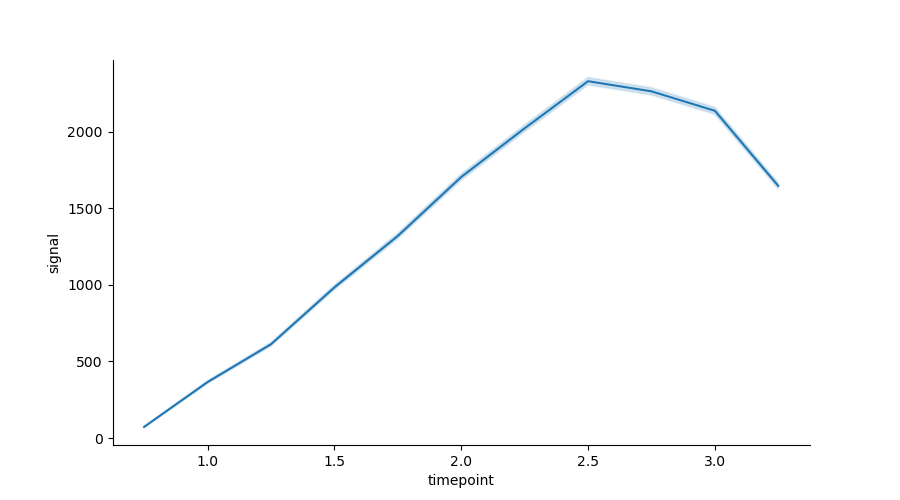

In [204]:
plot_spectrum(spectrum_df, norm = False)